# Make ACTN2 Affimer PERPL analysis plots

## Imports

In [1]:
import numpy as np
import modelling_general
import plotting
import zdisk_modelling
import zdisk_plots
import matplotlib.pyplot as plt

## Set average estimated localisation precision for Affimer and PALM data.
This is the mean after filtering for localisation precision < 5 nm.

In [4]:
meos_precision = 3.4 # Mean value after filtering for precision < 5 nm

## Set standard maximum distance over which to plot distances and fit models.

In [3]:
fitlength = 100.

## Choose Affimer relative position data and combine files if necessary
### Insert paths to the Affimer relative position data here:

In [4]:
actn_meos_relpos_path = r'../perpl_test_data/ACTN2-mEos2_PERPL-relpos_200.0filter_6FOVs_aligned_len1229656.pkl'


### Select desired datasets to combine here:
These contain all data attributes, including the relative positions in both directions for each pair of localisations. We will filter e.g. for cell-axial data later.

In [5]:
path_list = [actn_meos_relpos_path]
relpos = zdisk_modelling.read_relpos_from_pickles(path_list)

### Data attributes and number of data points:

In [6]:
relpos.iloc[0, :] # This shows the first relative position.

axial           67.263878
perpaxis2D     156.123034
tocoverslip   -120.177951
z_nzcorr      -123.792325
transverse     199.245932
Name: 0, dtype: float64

In [7]:
len(relpos) # This shows how many relative positions.

1229656

## Get the axial (X) distances, without duplicates
The YZ-distance limit for pairs of localisations to include can be set here.

In [8]:
# This is the YZ-distance limit for X-distances to include:
transverse_limit = 10.

axial_distances = zdisk_modelling.getaxialseparations_no_smoothing(
    relpos,
    max_distance=relpos.axial.max(),
    transverse_limit=transverse_limit
    )
axial_distances = zdisk_modelling.remove_duplicates(axial_distances)

## Set the X-distances at which to calculate the axial RPD

In [9]:
calculation_points = np.arange(fitlength + 1.)

## Calculate the axial RPD with smoothing for Churchman 1D function

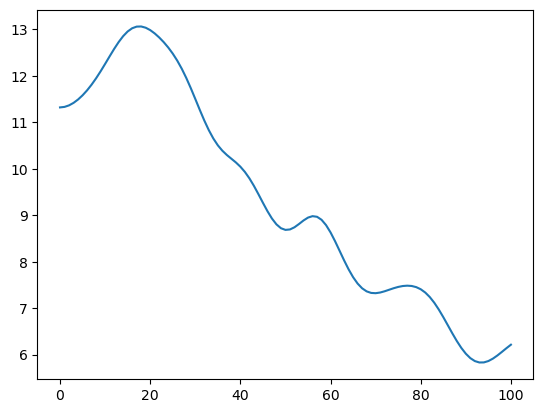

In [16]:
axial_rpd = plotting.estimate_rpd_churchman_1d(
    input_distances=axial_distances,
    calculation_points=calculation_points,
    combined_precision=6
    # combined_precision=(np.sqrt(2) * meos_precision)
)
plt.plot(calculation_points, axial_rpd)

## Get the 1-nm bin histogram data
Up to distance = fitlength

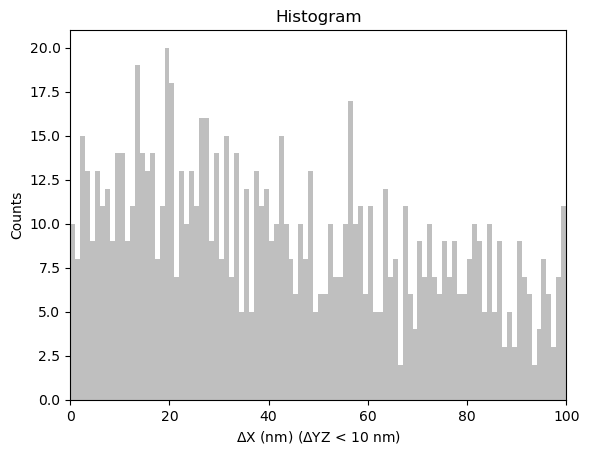

In [11]:
hist_values, bin_edges = zdisk_plots.plot_distance_hist(
    axial_distances,
    fitlength
    )
bin_centres = (bin_edges[0:(len(bin_edges) - 1)] + bin_edges[1:]) / 2

## Get the KDE data (estimate every 1 nm)

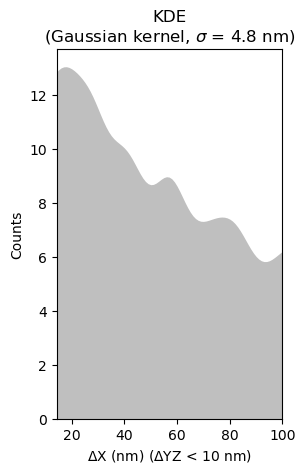

In [13]:
kde_x_values, kde = zdisk_plots.plot_distance_kde(
    axial_distances,
    meos_precision,
    fitlength
    )

## Choose axial model

In [12]:
# axial_model_with_info = zdisk_modelling.set_up_model_5_variable_peaks_with_fit_settings()
# axial_model_with_info = zdisk_modelling.set_up_model_5_variable_peaks_bg_flat_with_fit_settings()
axial_model_with_info = zdisk_modelling.set_up_model_5_variable_peaks_with_replocs_bg_flat_with_fit_settings()
# axial_model_with_info = zdisk_modelling.set_up_model_5_peaks_fixed_ratio_with_fit_settings()
# axial_model_with_info = zdisk_modelling.set_up_model_5_peaks_fixed_ratio_no_replocs_with_fit_settings()
# axial_model_with_info = zdisk_modelling.set_up_model_linear_fit_plusreplocs_with_fit_settings()
# axial_model_with_info = zdisk_modelling.set_up_model_onepeak_with_fit_settings()
# axial_model_with_info = zdisk_modelling.set_up_model_onepeak_plus_replocs_with_fit_settings()
# axial_model_with_info = zdisk_modelling.set_up_model_onepeak_plus_replocs_flat_bg_with_fit_settings()

## Fit model to Churchman-smoothed RPD

In [13]:
(params_optimised,
 params_covar,
 params_1sd_error) = zdisk_modelling.fitmodel_to_hist(
    calculation_points,
    axial_rpd,
    axial_model_with_info.model_rpd,
    axial_model_with_info.initial_params,
    axial_model_with_info.param_bounds,
    )
print('')
print('Initial parameter guesses:')
print(axial_model_with_info.initial_params)
print('')
print('Parameter bounds:')
print(axial_model_with_info.param_bounds)

[[2.01716526e+01 5.58912710e-02]
 [8.55421669e+00 1.39065236e-01]
 [5.34192639e+01 2.21872205e+00]
 [3.21214565e+01 4.08645155e+00]
 [5.66108157e+01 7.03518386e+00]
 [7.94073215e+01 9.92793639e+00]
 [8.80491604e+01 1.41702567e+01]
 [3.57213075e+01 2.11516382e+00]
 [7.08804515e+02 1.03666711e+02]
 [1.90008565e-15 1.06574832e+00]]
SSR = 0.31546578708261297
AIC = -560.6513815631188
AICcorr = -557.6850894282874

Initial parameter guesses:
[20, 5, 1, 1, 1, 1, 1, 3, 1, 20]

Parameter bounds:
([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [50, 20, 1000, 1000, 1000, 1000, 10000, 50, 1000, 100])


x at zero bg is -2.6806906686564936e-18.


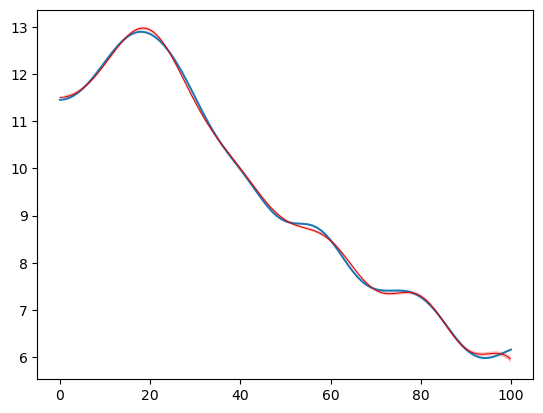

In [14]:
plt.plot(calculation_points, axial_rpd)
zdisk_plots.plot_fitted_model(
    axial_distances,
    fitlength,
    params_optimised,
    params_covar,
    axial_model_with_info,
    plot_95ci=True
    )

## Plot histogram, Churchman KDE and fitted model with confidence intervals.

[[2.01062537e+01 5.35352216e-02]
 [8.67866356e+00 1.28657111e-01]
 [5.60071490e+01 2.25434866e+00]
 [3.65280269e+01 4.26827496e+00]
 [6.27633411e+01 7.25753746e+00]
 [8.54995969e+01 1.00851966e+01]
 [9.15860018e+01 1.40614340e+01]
 [3.44227433e+01 1.89800196e+00]
 [6.79642250e+02 9.20444051e+01]
 [1.13718132e-15 9.91251594e-01]]
SSR = 0.2522610846722091
AIC = -576.2460863501948
AICcorr = -573.2460863501948


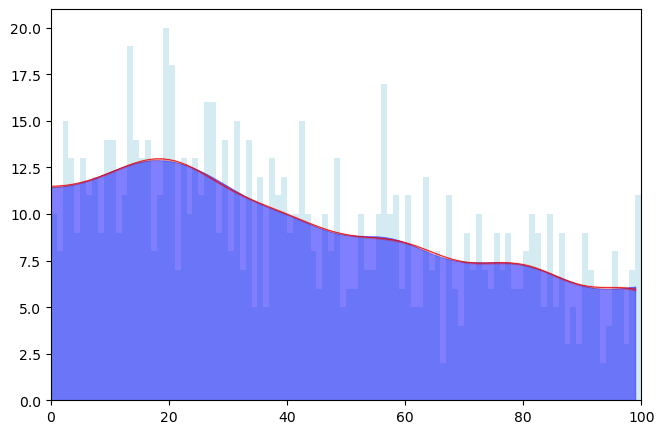

In [2]:
zdisk_plots.actn_mEos_x_plot()

## Fit model to histogram values
This results in an error for some models because of the bin-to-bin noise of the histogram giving the fitting algorithm a challenge.

In [ ]:
(params_optimised,
 params_covar,
 params_1sd_error) = zdisk_modelling.fitmodel_to_hist(
    bin_centres,
    hist_values,
    axial_model_with_info.model_rpd,
    axial_model_with_info.initial_params,
    axial_model_with_info.param_bounds,
    )
print('')
print('Initial parameter guesses:')
print(axial_model_with_info.initial_params)
print('')
print('Parameter bounds:')
print(axial_model_with_info.param_bounds)

In [ ]:
hist_values, bin_edges = zdisk_plots.plot_distance_hist(
    axial_distances,
    fitlength
    )
zdisk_plots.plot_fitted_model(
    axial_distances,
    fitlength,
    params_optimised,
    params_covar,
    axial_model_with_info,
    plot_95ci=True
    )

## Plot fitted model over KDE data

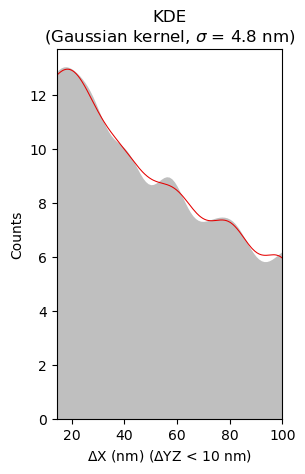

In [28]:
zdisk_plots.plot_distance_kde(
    axial_distances,
    meos_precision,
    fitlength
    )
zdisk_plots.plot_fitted_model(
    axial_distances,
    fitlength,
    params_optimised,
    params_covar,
    axial_model_with_info
    )

## Plot fitted model over histogram data, with confidence intervals on the model
### NOTE: IT TAKES A WHILE TO CALCULATE THE CONFIDENCE INTERVALS
### Skip this if you don't need it right now.

x at zero bg is -2.6806906686564936e-18.


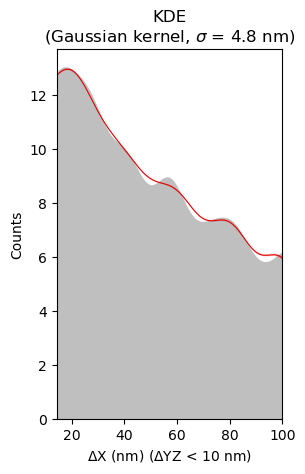

In [29]:
zdisk_plots.plot_distance_kde(
    axial_distances,
    meos_precision,
    fitlength
    )
zdisk_plots.plot_fitted_model(
    axial_distances,
    fitlength,
    params_optimised,
    params_covar,
    axial_model_with_info,
    plot_95ci=True
    )

## Plot model components for best model (5 peaks with independent amplitudes)
Only for illustrating axial RPD model with 5 independent-amplitude peaks, plus linear background.

In [ ]:
#zdisk_plots.plot_model_components_5peaks_variable(
#    kde_x_values,
#    *params_optimised)

# Transverse distances

## Get the transverse (YZ) distances, without duplicates
The X-distance limit for pairs of localisations to include can be set here.

In [9]:
# This is the YZ-distance limit for X-distances to include:
axial_limit = 10.
print(relpos.shape)

trans_distances = zdisk_modelling.get_transverse_separations(
    relpos,
    max_distance=relpos.transverse.max(),
    axial_limit=axial_limit
    )
trans_distances = zdisk_modelling.remove_duplicates(trans_distances)

(1229656, 5)


## Choose analysis lengthscale for transverse distance

In [10]:
fitlength = 50.

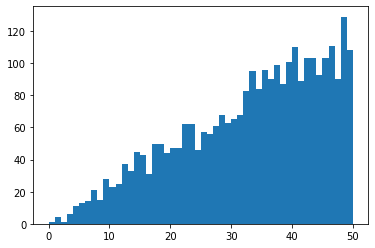

In [11]:
hist_1nm_bins = plt.hist(trans_distances, bins=np.arange(fitlength + 1.))

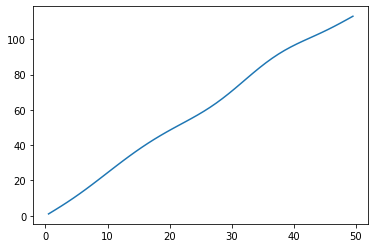

In [57]:
fitlength = 50.
calculation_points = np.arange(fitlength) + 0.5
combined_precision = np.sqrt(2) * meos_precision
combined_precision = np.sqrt(2) * meos_precision
transverse_rpd = plotting.estimate_rpd_churchman_2d(
    input_distances=trans_distances[trans_distances < (fitlength + 3 * combined_precision)],
    calculation_points=calculation_points,
    combined_precision=combined_precision
)
plt.plot(calculation_points, transverse_rpd)

## Normalise for increasing search circle with increasing distance

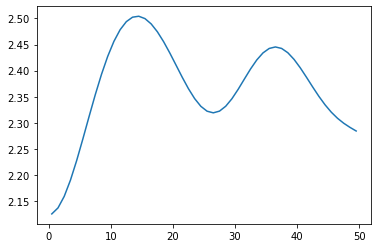

In [58]:
normalised_transverse_rpd = transverse_rpd[calculation_points > 0.] / calculation_points[calculation_points > 0.]
norm_rpd_calculation_points = calculation_points[calculation_points > 0.]

plt.plot(norm_rpd_calculation_points, normalised_transverse_rpd)

(0, 2.629535511108034)

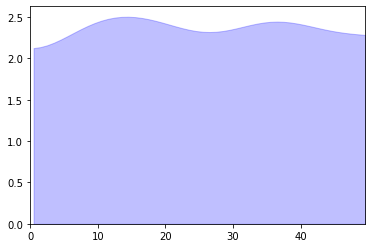

In [60]:
yz_fig = plt.figure()
yz_axes = yz_fig.add_subplot(111)
yz_axes.fill_between(calculation_points, 0, normalised_transverse_rpd,
                    color='blue', alpha=0.25)
yz_axes.set_xlim(0, 49.5)
yz_axes.set_ylim(0,)

In [52]:
import numpy as np
24. * np.sqrt(2)

33.941125496954285

### Optional save/load to save time

In [53]:
# np.save('normalised_transverse_rpd_smoothed_Churchman-4p8', normalised_transverse_rpd)
# normalised_transverse_rpd = np.load('normalised_transverse_rpd_smoothed_Churchman-4p8.npy')

## Set up model RPD and fit
Tried a few smoothing kernel widthes and fitted up to 50 nm.

In [54]:
trans_model_with_info = zdisk_modelling.set_up_model_2d_twopeaks_flat_bg_with_fit_settings()

In [61]:
(params_optimised,
 params_covar,
 params_1sd_error) = zdisk_modelling.fitmodel_to_hist(
    norm_rpd_calculation_points[0:50],
    normalised_transverse_rpd[0:50],
    trans_model_with_info.model_rpd,
    trans_model_with_info.initial_params,
    trans_model_with_info.param_bounds
    )
print('')
print('Initial parameter guesses:')
print(trans_model_with_info.initial_params)
print('')
print('Parameter bounds:')
print(trans_model_with_info.param_bounds)

[[1.70432750e+01 2.72474169e-01]
 [3.83918040e+01 5.41464807e-01]
 [6.49453629e+00 5.86518058e-01]
 [9.58085134e+01 2.08526369e+01]
 [1.96355890e+02 5.00153139e+01]
 [2.14249464e+00 5.18078292e-02]]
SSR = 0.05350749514200236
AIC = -327.9978272104336
AICcorr = -325.33116054376694

Initial parameter guesses:
[20, 40.0, 5, 1, 1, 20]

Parameter bounds:
([0, 0, 0, 0, 0, 0], [50, 50.0, 20, 1000, 1000, 100])


## Calculate 95% CIs

In [67]:
stdev = modelling_general.stdev_of_model(calculation_points,
                            params_optimised,
                            params_covar,
                                trans_model_with_info.vector_input_model)

C:\Code\perpl-python3\models_2d_distances_normalised.py:101: RuntimeWarning: invalid value encountered in double_scalars
  / x_values # Normalisation
C:\Code\perpl-python3\models_2d_distances_normalised.py:104: RuntimeWarning: invalid value encountered in double_scalars
  / x_values # Normalisation
C:\Users\fbsacu\Miniconda3\envs\PERPL\lib\site-packages\numdifftools\extrapolation.py:489: RuntimeWarning: invalid value encountered in less_equal
  converged = err <= tol
C:\Users\fbsacu\Miniconda3\envs\PERPL\lib\site-packages\numdifftools\limits.py:173: RuntimeWarning: invalid value encountered in less
  outliers = (((abs(der) < (a_median / trim_fact)) +
C:\Users\fbsacu\Miniconda3\envs\PERPL\lib\site-packages\numdifftools\limits.py:174: RuntimeWarning: invalid value encountered in greater
  (abs(der) > (a_median * trim_fact))) * (a_median > 1e-8) +
C:\Users\fbsacu\Miniconda3\envs\PERPL\lib\site-packages\numdifftools\limits.py:175: RuntimeWarning: invalid value encountered in less
  ((der <

In [ ]:
plt.plot(norm_rpd_calculation_points[0:50],
    normalised_transverse_rpd[0:50])
zdisk_plots.plot_fitted_model(
    norm_rpd_calculation_points[0:50],
    51.,
    params_optimised,
    params_covar,
    trans_model_with_info,
    plot_95ci=True
    )

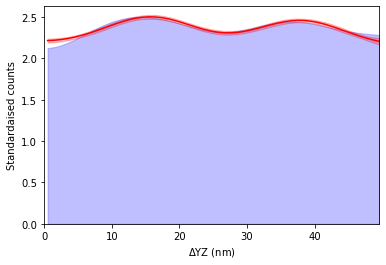

In [80]:
yz_fig = plt.figure()
yz_axes = yz_fig.add_subplot(111)
yz_axes.fill_between(calculation_points, 0, normalised_transverse_rpd,
                    color='blue', alpha=0.25)
yz_axes.set_xlim(0, 49.5)
yz_axes.set_ylim(0,)
yz_axes.plot(calculation_points,
             trans_model_with_info.model_rpd(calculation_points, *params_optimised),
            color='red')
yz_axes.fill_between(calculation_points,
                     trans_model_with_info.model_rpd(calculation_points, *params_optimised) - 1.96 * stdev,
                     trans_model_with_info.model_rpd(calculation_points, *params_optimised) + 1.96 * stdev,
                     color='red', alpha=0.25
                    )
yz_axes.set_ylabel('Standardaised counts')
yz_axes.set_xlabel('$\Delta$YZ (nm)')
yz_fig.savefig(r'..\data-perpl\ACTN2_mEos\YZ-dists-standardised-smoothed2xprec-fit-95ci.pdf',
              bbox_inches='tight')

In [ ]:
fitlength = 50.
calculation_points = np.arange(fitlength + 1.)
combined_precision = 6.
transverse_rpd = plotting.estimate_rpd_churchman_2d(
    input_distances=trans_distances[trans_distances < (fitlength + 3 * combined_precision)],
    calculation_points=calculation_points,
    combined_precision=combined_precision
)
plt.plot(calculation_points, transverse_rpd)

In [ ]:
normalised_transverse_rpd = transverse_rpd[calculation_points > 0.] / calculation_points[calculation_points > 0.]
norm_rpd_calculation_points = calculation_points[calculation_points > 0.]
plt.plot(norm_rpd_calculation_points, normalised_transverse_rpd)

### Optional save/load to save time

In [ ]:
# np.save('normalised_transverse_rpd_smoothed_Churchman-6', normalised_transverse_rpd)
# normalised_transverse_rpd = np.load('normalised_transverse_rpd_smoothed_Churchman-6.npy')

In [ ]:
calculation_points = np.arange(fitlength + 1.)
norm_rpd_calculation_points = calculation_points[calculation_points > 0.]
(params_optimised,
 params_covar,
 params_1sd_error) = zdisk_modelling.fitmodel_to_hist(
    norm_rpd_calculation_points[0:50],
    normalised_transverse_rpd[0:50],
    trans_model_with_info.model_rpd,
    trans_model_with_info.initial_params,
    trans_model_with_info.param_bounds
    )
print('')
print('Initial parameter guesses:')
print(trans_model_with_info.initial_params)
print('')
print('Parameter bounds:')
print(trans_model_with_info.param_bounds)

x at zero bg is -0.04294362892259386.


C:\Code\perpl-python3\models_2d_distances_normalised.py:101: RuntimeWarning: invalid value encountered in double_scalars
  / x_values # Normalisation
C:\Code\perpl-python3\models_2d_distances_normalised.py:104: RuntimeWarning: invalid value encountered in double_scalars
  / x_values # Normalisation
C:\Users\fbsacu\Miniconda3\envs\PERPL\lib\site-packages\numdifftools\extrapolation.py:489: RuntimeWarning: invalid value encountered in less_equal
  converged = err <= tol
C:\Users\fbsacu\Miniconda3\envs\PERPL\lib\site-packages\numdifftools\limits.py:173: RuntimeWarning: invalid value encountered in less
  outliers = (((abs(der) < (a_median / trim_fact)) +
C:\Users\fbsacu\Miniconda3\envs\PERPL\lib\site-packages\numdifftools\limits.py:174: RuntimeWarning: invalid value encountered in greater
  (abs(der) > (a_median * trim_fact))) * (a_median > 1e-8) +
C:\Users\fbsacu\Miniconda3\envs\PERPL\lib\site-packages\numdifftools\limits.py:175: RuntimeWarning: invalid value encountered in less
  ((der <

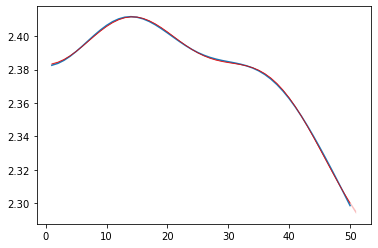

In [23]:
plt.plot(norm_rpd_calculation_points[0:50],
    normalised_transverse_rpd[0:50])
zdisk_plots.plot_fitted_model(
    norm_rpd_calculation_points[0:50],
    51.,
    params_optimised,
    params_covar,
    trans_model_with_info,
    plot_95ci=True
    )

In [ ]:
fitlength = 50.
calculation_points = np.arange(fitlength + 1.)
combined_precision = 8.
transverse_rpd = plotting.estimate_rpd_churchman_2d(
    input_distances=trans_distances[trans_distances < (fitlength + 3 * combined_precision)],
    calculation_points=calculation_points,
    combined_precision=combined_precision
)
plt.plot(calculation_points, transverse_rpd)

In [ ]:
normalised_transverse_rpd = transverse_rpd[calculation_points > 0.] / calculation_points[calculation_points > 0.]
norm_rpd_calculation_points = calculation_points[calculation_points > 0.]
plt.plot(norm_rpd_calculation_points, normalised_transverse_rpd)

### Optional save/load to save time

In [ ]:
# np.save('normalised_transverse_rpd_smoothed_Churchman-8', normalised_transverse_rpd)
# normalised_transverse_rpd = np.load('normalised_transverse_rpd_smoothed_Churchman-6.npy')

In [ ]:
# calculation_points = np.arange(fitlength + 1.)
# norm_rpd_calculation_points = calculation_points[calculation_points > 0.]
(params_optimised,
 params_covar,
 params_1sd_error) = zdisk_modelling.fitmodel_to_hist(
    norm_rpd_calculation_points[0:50],
    normalised_transverse_rpd[0:50],
    trans_model_with_info.model_rpd,
    trans_model_with_info.initial_params,
    trans_model_with_info.param_bounds
    )
print('')
print('Initial parameter guesses:')
print(trans_model_with_info.initial_params)
print('')
print('Parameter bounds:')
print(trans_model_with_info.param_bounds)

In [ ]:
plt.plot(norm_rpd_calculation_points[0:50],
    normalised_transverse_rpd[0:50])
zdisk_plots.plot_fitted_model(
    norm_rpd_calculation_points[0:50],
    51.,
    params_optimised,
    params_covar,
    trans_model_with_info,
    plot_95ci=True
    )

In [ ]:
fitlength = 50.
calculation_points = np.arange(fitlength + 1.)
combined_precision = 10.
transverse_rpd = plotting.estimate_rpd_churchman_2d(
    input_distances=trans_distances[trans_distances < (fitlength + 3 * combined_precision)],
    calculation_points=calculation_points,
    combined_precision=combined_precision
)
plt.plot(calculation_points, transverse_rpd)

In [ ]:
normalised_transverse_rpd = transverse_rpd[calculation_points > 0.] / calculation_points[calculation_points > 0.]
norm_rpd_calculation_points = calculation_points[calculation_points > 0.]
plt.plot(norm_rpd_calculation_points, normalised_transverse_rpd)

### Optional save/load to save time

In [ ]:
# np.save('normalised_transverse_rpd_smoothed_Churchman-10', normalised_transverse_rpd)
# normalised_transverse_rpd = np.load('normalised_transverse_rpd_smoothed_Churchman-6.npy')

In [ ]:
# calculation_points = np.arange(fitlength + 1.)
# norm_rpd_calculation_points = calculation_points[calculation_points > 0.]
(params_optimised,
 params_covar,
 params_1sd_error) = zdisk_modelling.fitmodel_to_hist(
    norm_rpd_calculation_points[0:50],
    normalised_transverse_rpd[0:50],
    trans_model_with_info.model_rpd,
    trans_model_with_info.initial_params,
    trans_model_with_info.param_bounds
    )
print('')
print('Initial parameter guesses:')
print(trans_model_with_info.initial_params)
print('')
print('Parameter bounds:')
print(trans_model_with_info.param_bounds)

In [ ]:
plt.plot(norm_rpd_calculation_points[0:50],
    normalised_transverse_rpd[0:50])
zdisk_plots.plot_fitted_model(
    norm_rpd_calculation_points[0:50],
    51.,
    params_optimised,
    params_covar,
    trans_model_with_info,
    plot_95ci=True
    )